In [1]:
from xspec import *
from astropy.io import fits
import matplotlib.pyplot as plt

import numpy as np

basepathmod = '/mnt/d/Users/User/Downloads/chspec-main/'
AllModels.lmod('chspec', dirPath=basepathmod)
print("Model package chisoth successfully loaded.")
AllData.clear()
AllModels.clear()







***Error: Xspec was unable to load the model package: chspec
   Either it could not find the model library file in the directory:
/mnt/d/Users/User/Downloads/chspec-main/
   or the file contains errors.
   (try "load (path)/(lib filename)" for more error info)


Exception: Error attempting to load local model library.

In [42]:
import xspec
AllData.clear()
AllModels.clear()

specfile="AL1_spec_6.pha"
#arf="ch2_xsm_20240212_1.arf"

spec = Spectrum(specfile)

#response=spec.response
# Enable gain in the response model
#response.setPars('gain slope 1.0 gain offset 0.0')

#gain = response.gain
#gain.slope.frozen = False  # Allow XSPEC to vary the slope
#gain.offset.frozen = False  # Allow XSPEC to vary the offset
xspec.AllModels.systematic = 0.04

Plot.device = '/xw'    
Plot.xAxis = 'keV'

spec.ignore("**-2.0 12.0-**")

model=Model("chisoth+chisoth")


# Perform the fit
#Fit.perform()

model(1).values=[7] 
#model(32).values=[0.5]
model(32).values=[7.1]
#model(65).values=[0.5]

model(18).frozen = False  # Ar Abundance
model(20).frozen = False  #Ca Abundance
model(26).frozen = False  # Fe Abundance
model(28).frozen = False #Ni Abundance
#model(12).frozen=False
#model(14).frozen=False
model(16).frozen=False
#model(13).frozen=False

#model(28).link = "26"

Fit.perform()

# Extract the required parameters
temperature1 = model(1).values[0]  # Temperature 
emission_measure1 = model(31).values[0]  #Emission Measure 
Fe_abundance = model(26).values[0] 
Ca_abundance = model(20).values[0]  
Ar_abundance = model(18).values[0] 
Ni_abundance = model(28).values[0]
#Gain=gain.slope.values[0]
#Offset=gain.offset.values[0]
#Mg_abundance = model(12).values[0]
#Si_abundance = model(14).values[0]
S_abundance = model(16).values[0]
#Al_abundance = model(13).values[0]
#Sigma1=model(32).values[0]
temperature2=model(32).values[0]
emission_measure2=model(62).values[0]
#Sigma2=model(65).values[0]
chisq = Fit.statistic  # Total chi-square value
dof = Fit.dof          # Degrees of freedom
re_chi = chisq / dof  # Reduced chi-square
Plot("ldata delchi")
#xspec.Plot("ldata model")

spectrum = np.array(xspec.Plot.y(1))   
energy = np.array(xspec.Plot.x(1)) 
chisoth_model = np.array(xspec.Plot.model(1)) 
spectrum_error = np.array(xspec.Plot.yErr(1)) 
residuals = (spectrum - chisoth_model) / spectrum_error  





***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: AL1_spec_6.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.362e+03 +/- -nan     
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-512
  Telescope: AL1 Instrument: SOLEXS  Channel Type: PHA
  Exposure Time: 30 sec
 Using fit statistic: chi
 Using Response (RMF) File            solexs_gaussian_SDD2_512.rmf for Source 1
 Using Auxiliary Response (ARF) File  solexs_arf_SDD2.fits


 The default systematic error for models is set to 0.04

    42 channels (1-42) ignored in spectrum #     1
   261 channels (252-512) ignored in spectrum #     1


Model chisoth<1> + chisoth<2> Source No.: 1   Active/On
Model fractional systematic error = 0.04
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be     

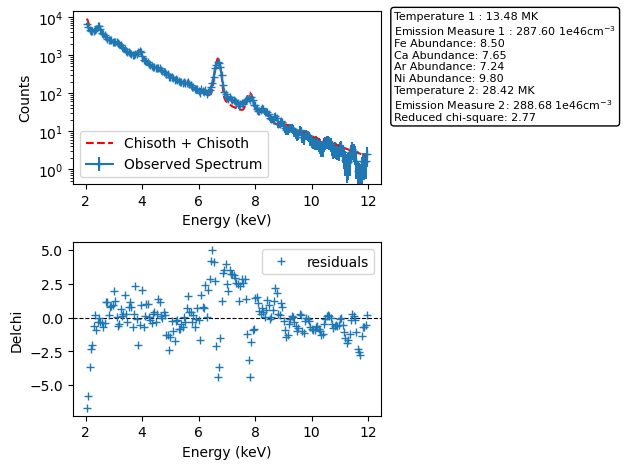

In [43]:
plt.subplot(2,1,1)
plt.errorbar(energy, spectrum, yerr=spectrum_error,fmt='+',linestyle='-', label='Observed Spectrum')
plt.plot(energy, chisoth_model,linestyle='--', color='red', label='Chisoth + Chisoth')
plt.yscale('log')

# Adding text to the plot
textstr = (
    f"Temperature 1 : {(10**temperature1)/1000000:.2f} MK\n"
    f"Emission Measure 1 : {emission_measure1:.2f} 1e46cm$^{{-3}}$\n"
    f"Fe Abundance: {Fe_abundance:.2f}\n"
    f"Ca Abundance: {Ca_abundance:.2f}\n"
    f"Ar Abundance: {Ar_abundance:.2f}\n"
    f"Ni Abundance: {Ni_abundance:.2f}\n"
    #f"Gain: {Gain:.2f}\n"
    #f"Offset: {Offset:.2f} keV\n"
    #f"Mg Abundance: {Mg_abundance:.2f}\n"
    #f"Si Abundance: {Si_abundance:.2f}\n"
    #f"S Abundance:  {S_abundance:.2f}\n"
    #f"Al Abundance: {Al_abundance:.2f}\n"
    #f"Sigma 1:{Sigma1:.2f}\n"
    f"Temperature 2: {(10**temperature2)/1000000:.2f} MK\n"
    f"Emission Measure 2: {emission_measure2:.2f} 1e46cm$^{{-3}}$\n"
    #f"Sigma 2:{Sigma2:.2f}\n"
    f"Reduced chi-square: {re_chi:.2f}")

# Place text on the plot (adjust x, y coordinates as needed)
plt.annotate(textstr, xy=(1.02, 1), xycoords='axes fraction', xytext=(5, 0),
             textcoords='offset points', ha='left', va='top', fontsize=8,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
# Set labels and add a legend
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(energy,residuals,fmt='+',label='residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Energy (keV)")
plt.ylabel("Delchi")
plt.legend()
plt.tight_layout()
plt.show()

# Show the plot
plt.show()